[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2015-01-02  24.347170  27.332500  27.860001  26.837500  27.847500  212818400
2015-01-05  23.661272  26.562500  27.162500  26.352501  27.072500  257142000
2015-01-06  23.663504  26.565001  26.857500  26.157499  26.635000  263188400
2015-01-07  23.995317  26.937500  27.049999  26.674999  26.799999  160423600
2015-01-08  24.917271  27.972500  28.037500  27.174999  27.307501  237458000


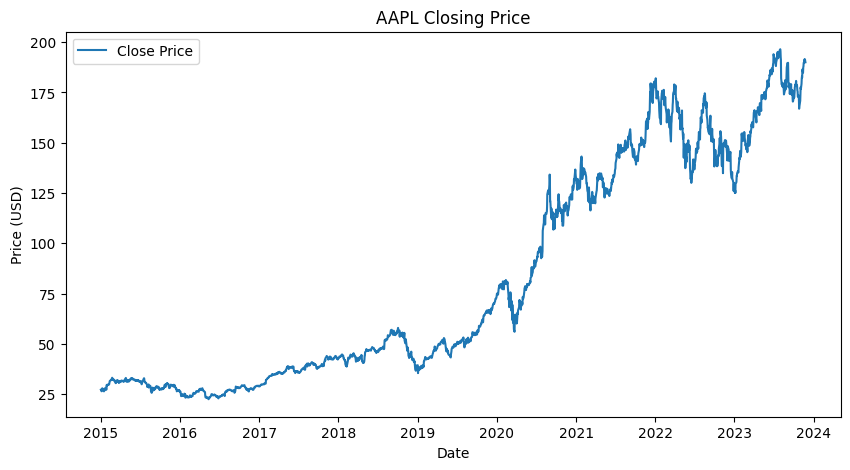

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Tải dữ liệu cổ phiếu
stock_symbol = "AAPL"  # Thay bằng mã cổ phiếu bạn muốn
data = yf.download(stock_symbol, start="2015-01-01", end="2023-11-25")

# Xem dữ liệu
print(data.head())

# Trực quan hóa giá đóng cửa
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{stock_symbol} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


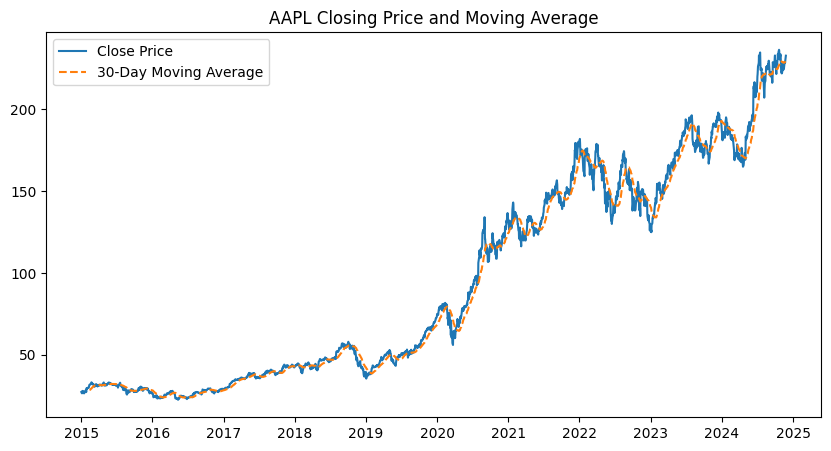

In [ ]:
# kiểm tra và xữ lý dữ liệu bị thiếu
print(data.isnull().sum())
data = data.dropna()
#tính giá trị trung bình trong 30 ngày
data['30_MA'] = data['Close'].rolling(window=30).mean()
#trực quan hóa giá đóng cửa và đường trung bình
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label= 'Close Price')
plt.plot(data['30_MA'], label='30-Day Moving Average', linestyle= '--')
plt.title(f'{stock_symbol} Closing Price and Moving Average')
plt.legend()
plt.show()

c:\Users\Quang Huy\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Quang Huy\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Quang Huy\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Quang Huy\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No suppor

Mean Squared Error: 2123.187212373266


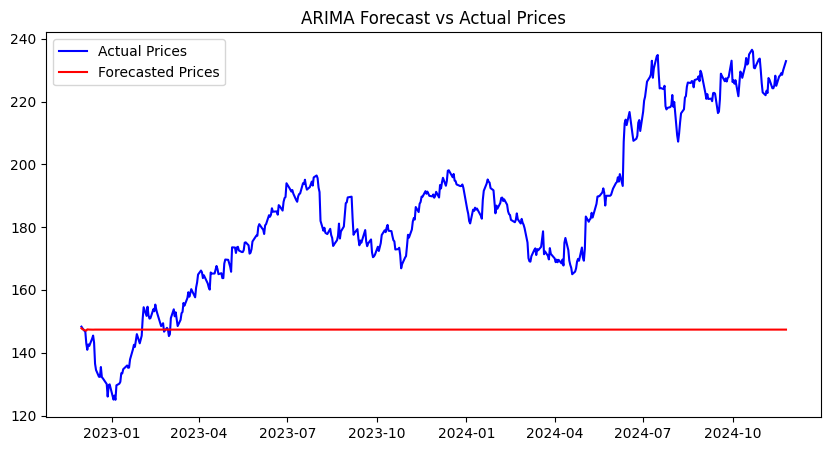

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Chọn cột giá đóng cửa
prices = data['Close']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Xây dựng mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Tham số (p=5, d=1, q=0)
model_fit = model.fit()

# Dự báo
forecast = model_fit.forecast(steps=len(test))
forecast = np.array(forecast)

# Đánh giá mô hình
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

# Trực quan hóa kết quả
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast, label='Forecasted Prices', color='red')
plt.title('ARIMA Forecast vs Actual Prices')
plt.legend()
plt.show()
